### Dimensionality reduction 

In [30]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.preprocessing import Imputer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import swifter

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly as py


%matplotlib inline
pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

In [50]:
data_set = 'test'
save_plots = False
colour_by = ['Site']
#colour_by = ['class', 'SubSite' ,'Region']

In [48]:
if data_set == 'all_train':
    %store -r train_data
    %store -r PC_df_train
    %store -r my_pca_train
    %store -r tsne_df_train
    
    data = train_data
    PC_data = PC_df_train
    PCA_object = my_pca_train
    tsne_data = tsne_df_train
    
    
if data_set == 'bedrock':
    %store -r train_data
    %store -r PC_df_bedrock_train
    %store -r my_pca_train_bedrock
    %store -r tsne_df_bedrock_train
    
    data = train_data[train_data['Geology'] == 'Bedrock']
    PC_data = PC_df_bedrock_train
    PCA_object = my_pca_train_bedrock
    tsne_data = tsne_df_bedrock_train
    
if data_set == 'superficial':
    %store -r train_data
    %store -r PC_df_superficial_train
    %store -r my_pca_train_superficial
    %store -r tsne_df_superficial_train
    
    data = train_data[train_data['Geology'] == 'Superficial'].reset_index(drop = True)
    PC_data = PC_df_superficial_train
    PCA_object = my_pca_train_superficial
    tsne_data = tsne_df_superficial_train

    
if data_set == 'test':
    %store -r test_data
    %store -r PC_df_test
    %store -r my_pca_test
    %store -r tsne_df_test
    
    data = test_data.reset_index(drop = True)
    data['class'] = 1
    PC_data = PC_df_test
    PCA_object = my_pca_test
    tsne_data = tsne_df_test

# Append column that will colour the datapoints

In [51]:
data.head()
#PC_datan
#PCA_object
#tsne_data 

,Analysis,Geology,Province,Region,Site,SubSite,Formation,Band,Nodule,Li7,Be9,B11,Mg24,Al27,Si28,P31,S33,K39,Ca42,Sc45,Ti47,V51,Cr52,Mn55,Fe56,Co59,Ni60,Cu63,Zn68,Ga69,Ge72,As75,Rb85,Sr88,Y89,Zr90,Nb93,Mo95,Cd111,In115,Sn118,Cs133,Ba137,La139,Ce140,Pr141,Nd146,Sm147,Eu153,Gd157,Tb159,Dy163,Ho165,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238,class
0,06_DH1_1,Artefacts,NaN,NaN,DH,NaN,NaN,NaN,DH1,2.79,0.95,93.21,27.83,635.24,465388.29,35.07,806.55,443.10,119.05,1.08,37.77,0.51,5.18,3.27,35.38,0.11,1.03,11.14,20.75,0.69,1.37,0.44,0.72,2.00,0.21,1.43,0.14,0.08,1.63,0.01,0.19,0.03,5.95,0.18,0.57,0.07,0.34,0.04,0.01,0.05,0.01,0.06,0.01,0.03,0.01,0.03,0.02,0.04,0.01,6.12,0.11,0.25,1
1,07_DH1_2,Artefacts,NaN,NaN,DH,NaN,NaN,NaN,DH1,2.37,1.29,95.19,27.99,639.09,465388.40,31.65,807.55,442.10,119.74,1.09,24.32,0.60,5.43,2.30,49.23,0.10,1.22,8.64,18.15,0.86,1.93,0.44,0.77,1.84,0.21,1.47,0.14,0.11,0.12,0.01,0.19,0.03,7.51,0.19,0.53,0.06,0.24,0.07,0.02,0.05,0.01,0.05,0.01,0.02,0.00,0.01,0.00,0.04,0.01,5.57,0.09,0.25,1
2,08_DH1_3,Artefacts,NaN,NaN,DH,NaN,NaN,NaN,DH1,2.46,1.33,93.63,26.43,670.48,465378.49,25.43,837.73,444.28,140.99,1.17,17.93,0.62,2.61,1.40,16.46,0.10,1.01,3.44,17.54,0.79,2.14,0.42,0.71,1.93,0.13,1.16,0.14,0.04,1.61,0.01,0.12,0.02,4.40,0.11,0.20,0.03,0.08,0.04,0.01,0.03,0.00,0.02,0.01,0.01,0.00,0.01,0.00,0.04,0.03,3.51,0.08,0.25,1
3,09_DH2_1,Artefacts,NaN,NaN,DH,NaN,NaN,NaN,DH2,18.47,0.11,63.80,31.98,1515.22,464555.55,24.63,750.62,736.64,141.70,1.19,72.65,1.52,2.87,1.09,16.76,0.09,1.07,1.10,14.33,0.75,1.59,0.46,1.62,4.29,0.20,1.45,0.25,0.03,0.22,0.01,0.19,0.04,12.48,0.23,0.40,0.06,0.25,0.06,0.02,0.05,0.01,0.05,0.01,0.02,0.00,0.05,0.00,0.05,0.01,0.54,0.09,0.08,1
4,10_DH2_2,Artefacts,NaN,NaN,DH,NaN,NaN,NaN,DH2,19.98,0.14,60.96,44.95,1742.08,464137.82,22.59,796.21,797.28,130.52,1.22,20.34,2.44,5.92,1.26,62.16,0.08,0.93,1.23,14.59,0.76,0.81,0.43,2.05,4.44,0.27,1.99,0.68,0.05,0.09,0.01,0.17,0.07,14.40,0.48,0.80,0.12,0.51,0.09,0.04,0.03,0.01,0.06,0.01,0.02,0.01,0.03,0.00,0.07,0.03,0.69,0.15,0.09,1


In [52]:
PC_data_withcolour = pd.concat([PC_data[['PC1', 'PC2', 'PC3']], data[colour_by]], axis = 1)

In [53]:
PC_data_withcolour.head()

,PC1,PC2,PC3,Site
0,-1.701391,1.131640,3.760622,DH
1,-2.672088,1.080469,1.590293,DH
2,-3.410185,0.748917,1.950106,DH
3,-1.632395,5.051251,-1.637259,DH
4,0.155328,6.981186,-2.204265,DH


In [54]:
%store PC_data_withcolour

Stored 'PC_data_withcolour' (DataFrame)


In [190]:
variances = PCA_object.explained_variance_ratio_
cumu_variances = np.cumsum(PCA_object.explained_variance_ratio_)

In [191]:
PC_names = PC_data_withcolour.columns.values[0:-1]

In [192]:
PC_data_withcolour.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,class
0,-5.545353,-0.180950,1.950146,4.342566,5.920559,0.433019,-1.341761,-1.640642,-0.756110,-0.614115,-0.167545,-1.221759,-0.672499,-0.014000,-0.065725,1.823099,0.292598,-0.807519,0.568577,0.164357,1.011928,0.993255,0.416145,-0.556557,0.584061,-0.430539,0.322079,1.204492,0.964201,-0.681964,1.666688,-1.060312,-1.202321,0.813015,-0.178829,-0.171936,-0.438277,-0.294887,0.308534,-0.129475,-0.859356,0.304136,-0.046898,-0.255190,0.166432,-0.266111,0.419148,0.034707,0.543612,0.000866,-0.078470,0.055403,-0.079813,PC
1,-4.934533,-2.863334,-0.176250,0.283980,1.083442,1.299799,1.648718,1.395152,0.184016,-2.326658,0.298659,-0.086004,0.745059,-0.066739,0.648019,-0.105446,0.098986,-1.059928,-0.242791,-0.266512,0.295834,0.098371,-0.018985,-0.090037,0.195422,-0.434469,0.130619,-0.001627,0.371096,-0.486024,0.009039,-0.540330,-0.303653,-0.038319,-0.146511,0.320915,0.177835,-0.084121,0.021209,0.054125,-0.269662,-0.103694,0.065919,0.080644,0.042863,0.131226,0.095125,-0.022672,-0.081218,-0.055843,0.041579,-0.052596,0.001339,PC
2,-4.789764,-2.597750,0.052504,0.352416,1.116776,1.710555,1.881723,1.052144,-0.106344,-2.097852,0.372030,-0.216146,1.219650,-0.456474,0.672337,-0.383926,0.205390,-1.182459,0.194908,-0.219482,0.303496,0.224086,-0.454005,0.445097,0.101015,-1.042610,0.237620,-0.064348,0.280673,-0.613015,0.016015,-0.424698,-0.306075,0.058657,-0.305272,0.214250,-0.203556,-0.243832,-0.049111,0.122115,-0.412458,-0.095610,0.024357,0.038382,-0.336206,0.122390,-0.000478,0.182065,-0.049404,0.079551,-0.019869,-0.036563,-0.007605,PC
3,-2.884019,-2.576534,-0.366307,1.973270,-0.119942,-2.824925,0.935334,-0.154385,-3.150830,-1.998010,1.004885,-1.373340,-0.811115,0.568563,-2.670609,-1.066842,0.780323,-0.503431,0.157354,1.703505,-0.314924,0.235040,0.177310,0.370430,1.291832,0.278151,0.473243,-0.748545,-0.728198,0.683705,0.135438,0.864409,-0.268398,-0.024659,-0.181141,-0.037924,0.545649,-0.259919,-0.889034,0.206190,0.148538,0.124393,0.095114,0.174348,0.226015,-0.010531,0.342956,0.285395,0.046855,-0.111381,0.138111,0.031848,-0.049394,PC
4,-3.273596,-2.539282,-0.404810,1.612593,-0.168238,-2.616886,0.693649,-0.177156,-2.997526,-2.186481,0.872215,-1.469028,-0.765035,0.816119,-2.278624,-0.799552,0.816456,-1.031963,0.519061,1.506568,-0.051307,0.663359,-0.032396,0.504131,1.045774,0.417735,0.554373,-0.177056,-0.459303,0.710027,-0.245399,0.251329,-0.664259,-0.075215,0.227298,-0.212281,0.275157,-0.393915,-0.832839,0.244793,-0.100375,0.138806,-0.128357,0.213847,0.303859,0.113942,0.547135,0.315160,0.149982,-0.063653,0.010193,0.043266,-0.047234,PC


# Visualise first two principal components
*x and y needs to be defined e.g. if want to plot principal components 1 and 2 then set to PC1 and PC2
*The associated percentage variance needs to be inputted in .format()

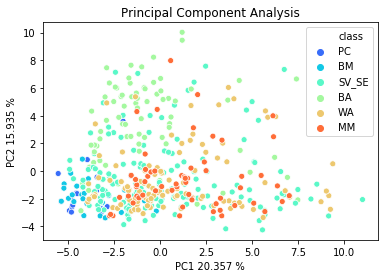

In [193]:
# X PC should be < than Y PC
plot_on_x = 'PC1'
plot_on_y = 'PC2'

plot = sns.scatterplot(data = PC_data_withcolour, x = plot_on_x, y = plot_on_y, hue=colour_by, palette = 'rainbow', )
plt.title('Principal Component Analysis')


var_val = int(plot_on_x.replace('PC', ''))
plt.xlabel('{0} {1} %'.format(plot_on_x, round(variances[var_val - 1]*100,3)))
plt.ylabel('{0} {1} %'.format(plot_on_y, round(variances[var_val]*100,3)))
plt.legend()

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='2d_pca_{0}_bedrock'.format(colour_by))

In [194]:
var_df = pd.DataFrame(data = {'percentage variance (%)' : variances, 'Principal components' : PC_names, 'cumulative percentage variance (%)':cumu_variances})

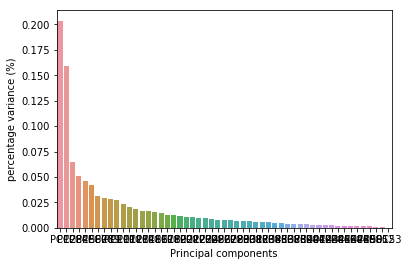

In [195]:
sns.barplot(data = var_df, y = 'percentage variance (%)', x = 'Principal components')

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='perc_var_bargraph_bedrock')

# Visualise cumulative variance with increasing number of principal components

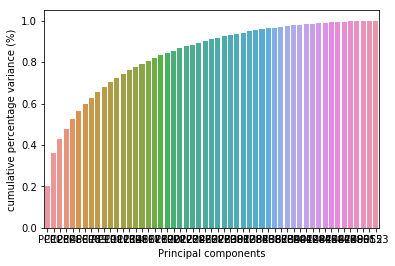

In [196]:

sns.barplot(data = var_df, y = 'cumulative percentage variance (%)', x = 'Principal components')


if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='cumu_perc_var_bargraph_bedrock')

In [197]:
PC_data_withcolour.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,class
0,-5.545353,-0.180950,1.950146,4.342566,5.920559,0.433019,-1.341761,-1.640642,-0.756110,-0.614115,-0.167545,-1.221759,-0.672499,-0.014000,-0.065725,1.823099,0.292598,-0.807519,0.568577,0.164357,1.011928,0.993255,0.416145,-0.556557,0.584061,-0.430539,0.322079,1.204492,0.964201,-0.681964,1.666688,-1.060312,-1.202321,0.813015,-0.178829,-0.171936,-0.438277,-0.294887,0.308534,-0.129475,-0.859356,0.304136,-0.046898,-0.255190,0.166432,-0.266111,0.419148,0.034707,0.543612,0.000866,-0.078470,0.055403,-0.079813,PC
1,-4.934533,-2.863334,-0.176250,0.283980,1.083442,1.299799,1.648718,1.395152,0.184016,-2.326658,0.298659,-0.086004,0.745059,-0.066739,0.648019,-0.105446,0.098986,-1.059928,-0.242791,-0.266512,0.295834,0.098371,-0.018985,-0.090037,0.195422,-0.434469,0.130619,-0.001627,0.371096,-0.486024,0.009039,-0.540330,-0.303653,-0.038319,-0.146511,0.320915,0.177835,-0.084121,0.021209,0.054125,-0.269662,-0.103694,0.065919,0.080644,0.042863,0.131226,0.095125,-0.022672,-0.081218,-0.055843,0.041579,-0.052596,0.001339,PC
2,-4.789764,-2.597750,0.052504,0.352416,1.116776,1.710555,1.881723,1.052144,-0.106344,-2.097852,0.372030,-0.216146,1.219650,-0.456474,0.672337,-0.383926,0.205390,-1.182459,0.194908,-0.219482,0.303496,0.224086,-0.454005,0.445097,0.101015,-1.042610,0.237620,-0.064348,0.280673,-0.613015,0.016015,-0.424698,-0.306075,0.058657,-0.305272,0.214250,-0.203556,-0.243832,-0.049111,0.122115,-0.412458,-0.095610,0.024357,0.038382,-0.336206,0.122390,-0.000478,0.182065,-0.049404,0.079551,-0.019869,-0.036563,-0.007605,PC
3,-2.884019,-2.576534,-0.366307,1.973270,-0.119942,-2.824925,0.935334,-0.154385,-3.150830,-1.998010,1.004885,-1.373340,-0.811115,0.568563,-2.670609,-1.066842,0.780323,-0.503431,0.157354,1.703505,-0.314924,0.235040,0.177310,0.370430,1.291832,0.278151,0.473243,-0.748545,-0.728198,0.683705,0.135438,0.864409,-0.268398,-0.024659,-0.181141,-0.037924,0.545649,-0.259919,-0.889034,0.206190,0.148538,0.124393,0.095114,0.174348,0.226015,-0.010531,0.342956,0.285395,0.046855,-0.111381,0.138111,0.031848,-0.049394,PC
4,-3.273596,-2.539282,-0.404810,1.612593,-0.168238,-2.616886,0.693649,-0.177156,-2.997526,-2.186481,0.872215,-1.469028,-0.765035,0.816119,-2.278624,-0.799552,0.816456,-1.031963,0.519061,1.506568,-0.051307,0.663359,-0.032396,0.504131,1.045774,0.417735,0.554373,-0.177056,-0.459303,0.710027,-0.245399,0.251329,-0.664259,-0.075215,0.227298,-0.212281,0.275157,-0.393915,-0.832839,0.244793,-0.100375,0.138806,-0.128357,0.213847,0.303859,0.113942,0.547135,0.315160,0.149982,-0.063653,0.010193,0.043266,-0.047234,PC


In [198]:
le = LabelEncoder()

In [199]:
PC_data_withcolour['class'] = le.fit_transform(PC_data_withcolour['class'])

### Interactive plots

In [200]:


plot_on_x = 'PC49'
plot_on_y = 'PC50'
plot_on_z = 'PC51'

colouring = PC_data_withcolour['class']
trace0 = go.Scatter3d(
    x = np.array(PC_data_withcolour[plot_on_x]),
    y = np.array(PC_data_withcolour[plot_on_y]),
    z = np.array(PC_data_withcolour[plot_on_z]),
    mode = 'markers',
    marker = dict(
        size = 2,
        color = colouring,
        colorscale = 'Rainbow',
        line = dict(
            width = 1,
        )
    )
)

data = [trace0]

var_val = int(plot_on_x.replace('PC', ''))
x_title = '{0} {1} %'.format(plot_on_x, round(variances[var_val - 1]*100,3))
y_title = title='{0} {1} %'.format(plot_on_y, round(variances[var_val]*100,3))
               

               
layout = go.Layout(autosize=False,width=900, height=800, title = 'Principal Component Analysis', xaxis=dict(title= x_title), yaxis= dict(title = y_title, range = [-20, 120]))

fig = dict(data=data, layout=layout)

if save_plots == True:
        py.offline.plot(fig, output_type='file', filename='pca_plot_3d'+ 'coloured_by' + colour_by + '.html')

### tSNE

In [201]:
tsne_data_withcolour = pd.concat([tsne_data, pd.Series(PC_data_withcolour['class'])], axis = 1)


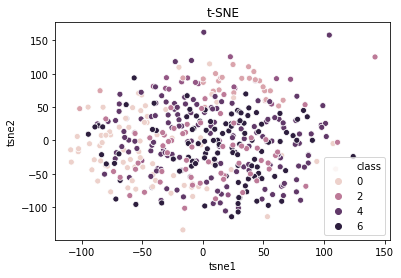

In [202]:
# X PC should be < than Y PC
plot_on_x = 'tsne1'
plot_on_y = 'tsne2'

sns.scatterplot(data = tsne_data_withcolour, x = plot_on_x, y = plot_on_y, hue=colour_by)
plt.title('t-SNE')



if save_plots == True:
    fig = plot.get_figure()
    fig.savefig(fname='2d_tSNE_{0}_bedrock'.format(colour_by))

In [203]:
tsne_data_withcolour['class'] = le.fit_transform(tsne_data_withcolour['class'])

In [204]:
save_plots = True

plot_on_x = 'tsne1'
plot_on_y = 'tsne2'
plot_on_z = 'tsne3'

colouring = tsne_data_withcolour['class']
trace0 = go.Scatter3d(
    x = np.array(tsne_data_withcolour[plot_on_x]),
    y = np.array(tsne_data_withcolour[plot_on_y]),
    z = np.array(tsne_data_withcolour[plot_on_z]),
    mode = 'markers',
    marker = dict(
        size = 2,
        color = colouring,
        colorscale = 'Rainbow',
        line = dict(
            width = 1,
        )
    )
)

data = [trace0]

layout = go.Layout(autosize=False,width=900, height=800, title = 't-SNE', xaxis=dict(title= x_title), yaxis= dict(title = y_title, range = [-20, 120]))

fig = dict(data=data, layout=layout)

if save_plots == True:
        py.offline.plot(fig, output_type='file', filename='tSNE_plot_3d'+ 'coloured_by' + colour_by + '.html')